This will plot already generated figures for exploration.

In [1]:
# savefiles
fullproc_r = '/Users/jnaiman/LMM_Figure_Parsing/resources/'

# get title and x/y labels from most frequent words
data_dir = '/Users/jnaiman/LMM_Figure_Parsing/resources/data/'

# save small bits of data?
save_small_dir = '/Users/jnaiman/LMM_Figure_Parsing/small_data/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
from glob import glob
import json

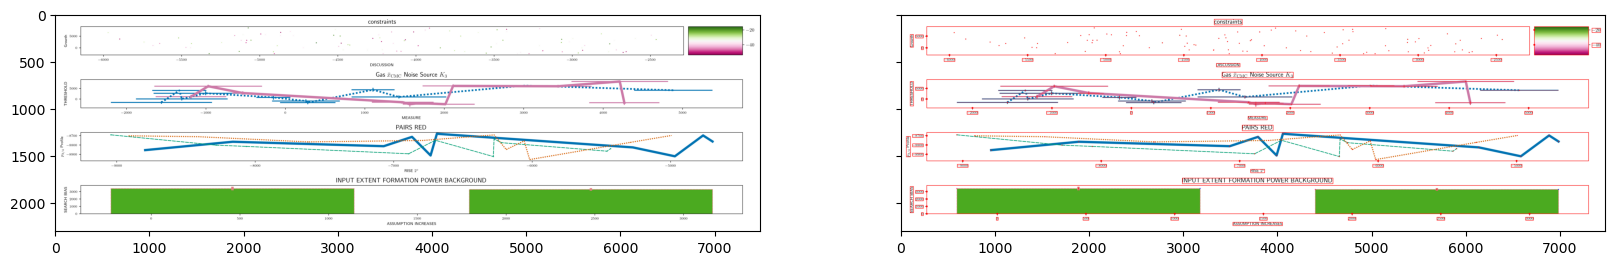

In [5]:
#%matplotlib widget
%matplotlib inline



plt.close('all')

csize = 5

ifig = 7 # which one to plot?


img = np.array(Image.open(save_small_dir+'Picture'+str(ifig+1)+'.png').convert('RGB'))
with open(save_small_dir+'Picture'+str(ifig+1)+'.json','r') as f:
    datas_plot1 = json.load(f) # weirdness
    datas_plot = json.loads(datas_plot1)
imgplot = img.copy()


#for k,v in datas_plot.items(): # all figs
iplot_count = 0
for p,v in datas_plot.items():
    iplot_count += 1
    #print(p)
    if 'plot' in p: # not figure stuffs... just yet
        #print('PLOT:', p)
        if v['type'] == 'line':
            xs = v['data pixels']['xs']
            ys = v['data pixels']['ys']
            for xx,yy in zip(xs,ys):
                for x,y in zip(xx,yy):
                    cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
        elif v['type'] == 'scatter':
            xs = v['data pixels']['xs']
            ys = v['data pixels']['ys']
            for x,y in zip(xs,ys):
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
            # colormap
            if 'color bar' in v:
                xmin,ymin = int(round(v['color bar']['xmin'])), int(round(img.shape[0]-v['color bar']['ymin']))
                xmax,ymax = int(round(v['color bar']['xmax'])), int(round(img.shape[0]-v['color bar']['ymax']))
                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
                # colormap ticks
                if 'color bar ticks' in v:
                    for d in v['color bar ticks']:
                        xmin,ymin,xmax,ymax = int(d['xmin']),int(img.shape[0]-d['ymin']),int(d['xmax']),int(img.shape[0]-d['ymax'])
                        # check if we should have it or not
                        if v['color bar']['params']['side'] == 'bottom' or v['color bar']['params']['side'] == 'top':
                            if d['tx']>=v['color bar']['xmin'] and d['tx']<=v['color bar']['xmax']:
                                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
                                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
                        else: # side
                            if d['ty']>=v['color bar']['ymin'] and d['ty']<=v['color bar']['ymax']:
                                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
                                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
        elif v['type'] == 'histogram':
            #rwidth = v['data from plot']['plot params']['rwidth']
            #print(iplot_count, 'rwidth',rwidth)
            # middle of bar
            xs = np.array(v['data pixels']['xs'])
            ys = np.array(v['data pixels']['ys'])
            for x,y in zip(xs,ys): # middle
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
            # right
            xsr = np.array(v['data pixels']['xs_right'])
            xsl = np.array(v['data pixels']['xs_left'])
            ###xsr = xsr + rwidth*np.abs(xsr-xsl)
            ysr = np.array(v['data pixels']['ys_right'])
            for x,y in zip(xsr,ysr): # middle
                cv.circle(imgplot, (int(x), int(y)), csize, (0,0,255), -1)
            # left
            ####xsl = xsl - 2*rwidth*np.abs(xs-xsl)
            ysl = np.array(v['data pixels']['ys_left'])
            for x,y in zip(xsl,ysl): # middle
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,125), -1)
        else:
            print('no idea how to deal!')
            import sys; sys.exit()

        # these are things for every plot
        for d in v['xticks']: # draw x-ticks
            xmin,ymin,xmax,ymax = int(d['xmin']),int(img.shape[0]-d['ymin']),int(d['xmax']),int(img.shape[0]-d['ymax'])
            if d['tx']>=v['square']['xmin'] and d['tx']<=v['square']['xmax']:
                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
            # also ticks
            if d['tx']>=v['square']['xmin'] and d['tx']<=v['square']['xmax']:
                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
        for d in v['yticks']: # draw y-ticks
            xmin,ymin,xmax,ymax = int(d['xmin']),int(img.shape[0]-d['ymin']),int(d['xmax']),int(img.shape[0]-d['ymax'])
            if d['ty']>=v['square']['ymin'] and d['ty']<=v['square']['ymax']:
                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
            if d['ty']>=v['square']['ymin'] and d['ty']<=v['square']['ymax']:
                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
        if v['type'] == 'line':
            if 'x error bars' in v['data pixels']:
                for il,l in enumerate(v['data pixels']['x error bars']):
                    for ie,(xmin,ymin,xmax,ymax) in enumerate(l):
                        xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                        xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                        # only take parts within square
                        xmin = max(xmin,int(round(v['square']['xmin'])))
                        xmax = min(xmax,int(round(v['square']['xmax'])))
                        ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                        ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                        cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
            if 'y error bars' in v['data pixels']:
                for l in v['data pixels']['y error bars']:
                    for xmin,ymin,xmax,ymax in l:
                        xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                        xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                        # only take parts within square
                        xmin = max(xmin,int(round(v['square']['xmin'])))
                        xmax = min(xmax,int(round(v['square']['xmax'])))
                        ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                        ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                        cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
        elif v['type'] == 'scatter' or v['type'] == 'histogram':
            if 'x error bars' in v['data pixels']:
                for xmin,ymin,xmax,ymax in v['data pixels']['x error bars']:
                    xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                    xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                    # only take parts within square
                    xmin = max(xmin,int(round(v['square']['xmin'])))
                    xmax = min(xmax,int(round(v['square']['xmax'])))
                    ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                    ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                    cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
            if 'y error bars' in v['data pixels']:
                for xmin,ymin,xmax,ymax in v['data pixels']['y error bars']:
                    #print(ymin,ymax)
                    xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                    xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                    xmin = max(xmin,int(round(v['square']['xmin'])))
                    xmax = min(xmax,int(round(v['square']['xmax'])))
                    ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                    ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                    cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
                    #print('')
        # square
        d = v['square']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # title bounding box
        if 'title' in v: # has a title?
            d = v['title']
            xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
            xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
            cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # xlabel bounding box
        d = v['xlabel']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # ylabel bounding box
        d = v['ylabel']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)


#fig2,ax2 = plt.subplots(1,2,figsize=(15,10), sharex=True, sharey=True) # widget
fig2,ax2 = plt.subplots(1,2,figsize=(20,20), sharex=True, sharey=True) # inline

ax2[0].imshow(img)
ax2[1].imshow(imgplot)
plt.show()